In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import random
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.visualize_util import plot
from tabulate import tabulate
from scipy import ndimage

Using TensorFlow backend.


In [2]:
def FFN(inputDim, outputDim):
    ffn = Sequential()
    ffn.add(Dense(1024, input_dim=inputDim, init='uniform', activation='tanh'))
    ffn.add(Dense(1024, input_dim=1024, init='uniform', activation='tanh'))
    ffn.add(Dense(outputDim, input_dim=1024, init='uniform'))
    ffn.add(Activation('sigmoid'))
    return ffn

In [3]:
def downSample(flatPicture,factor):
    newImage = np.zeros(len(flatPicture)/factor)
    i = 0;
    for iPixel in range(len(flatPicture)):
        if (iPixel%factor==0) & (i<len(newImage)):
            newImage[i] = flatPicture[iPixel]
            i+=1
    return newImage

In [4]:
def TrainNetwork(compiledNetwork, trainX, trainY, epochs):
    for iEpoch in range(epochs):
        compiledNetwork.train_on_batch(trainX, trainY)
        if iEpoch%100==0:
            print iEpoch
    return compiledNetwork

In [5]:
def TestNetwork(trainedNetwork, testX, outputDim):
    numPics = testX.shape[0];
    out = np.zeros((numPics,outputDim))
    for iPic in range(numPics):
        out[iPic,:] = trainedNetwork.predict(testX[iPic,:].T);
        print out[iPic]
    return out
        


In [6]:
originalGlaucomaTrain = [None]*10
trainX = np.zeros((20,8185))
for i in range(10):
    if i<9:
        iPic = '0' + str(i+1);
    else:
        iPic = '' + str(i+1);
    face = ndimage.imread('/Users/kaftand/Downloads/glaucoma/' + iPic +'_g.JPG',flatten=True)
    print '/Users/kaftand/Downloads/glaucoma/' + iPic +'_g.JPG'
    originalGlaucomaTrain[i] = face;
    face = face.flatten()
    trainX[i,:] = downSample(face,1000)/256.0
    

/Users/kaftand/Downloads/glaucoma/01_g.JPG
/Users/kaftand/Downloads/glaucoma/02_g.JPG
/Users/kaftand/Downloads/glaucoma/03_g.JPG
/Users/kaftand/Downloads/glaucoma/04_g.JPG
/Users/kaftand/Downloads/glaucoma/05_g.JPG
/Users/kaftand/Downloads/glaucoma/06_g.JPG
/Users/kaftand/Downloads/glaucoma/07_g.JPG
/Users/kaftand/Downloads/glaucoma/08_g.JPG
/Users/kaftand/Downloads/glaucoma/09_g.JPG
/Users/kaftand/Downloads/glaucoma/10_g.JPG


In [7]:
originalHealthyTrain = [None]*10
for i in range(10):
    if i<9:
        iPic = '0' + str(i+1);
    else:
        iPic = '' + str(i+1);
    face = ndimage.imread('/Users/kaftand/Downloads/healthy/' + iPic +'_h.JPG',flatten=True)
    print '/Users/kaftand/Downloads/healthy/' + iPic +'_h.JPG'
    originalHealthyTrain[i] = face;
    face = face.flatten()
    trainX[i+10,:] = downSample(face,1000)/256.0

/Users/kaftand/Downloads/healthy/01_h.JPG
/Users/kaftand/Downloads/healthy/02_h.JPG
/Users/kaftand/Downloads/healthy/03_h.JPG
/Users/kaftand/Downloads/healthy/04_h.JPG
/Users/kaftand/Downloads/healthy/05_h.JPG
/Users/kaftand/Downloads/healthy/06_h.JPG
/Users/kaftand/Downloads/healthy/07_h.JPG
/Users/kaftand/Downloads/healthy/08_h.JPG
/Users/kaftand/Downloads/healthy/09_h.JPG
/Users/kaftand/Downloads/healthy/10_h.JPG


In [8]:
trainY = np.zeros((20,1))
for i in range(10):
    trainY[i] =1;

In [9]:
net = FFN(trainX.shape[1],1)

In [10]:
net.compile(loss='binary_crossentropy', optimizer="SGD");

In [11]:
trainedNet = TrainNetwork(net, trainX, trainY, 2000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [12]:
testX = np.zeros((10,8185))
originalGlaucomaTest = [None]*5
originalHealthyTest = [None]*5
for i in range(5):
    if i<9:
        iPic =  '' + str(i+11);
    else:
        iPic = '' + str(i+11);
    face = ndimage.imread('/Users/kaftand/Downloads/glaucoma/' + iPic +'_g.JPG',flatten=True)
    print '/Users/kaftand/Downloads/glaucoma/' + iPic +'_g.JPG'
    originalGlaucomaTest[i] = face
    face = face.flatten()
    testX[i,:] = downSample(face,1000)/256.0
for i in range(5):
    if i<9:
        iPic =  '' + str(i+11);
    else:
        iPic = '' + str(i+11);
    face = ndimage.imread('/Users/kaftand/Downloads/healthy/' + iPic +'_h.JPG',flatten=True)
    originalHealthyTest[i] = face;
    face = face.flatten()
    testX[i+5,:] = downSample(face,1000)/256.0
    print '/Users/kaftand/Downloads/healthy/' + iPic +'_h.JPG'

/Users/kaftand/Downloads/glaucoma/11_g.JPG
/Users/kaftand/Downloads/glaucoma/12_g.JPG
/Users/kaftand/Downloads/glaucoma/13_g.JPG
/Users/kaftand/Downloads/glaucoma/14_g.JPG
/Users/kaftand/Downloads/glaucoma/15_g.JPG
/Users/kaftand/Downloads/healthy/11_h.JPG
/Users/kaftand/Downloads/healthy/12_h.JPG
/Users/kaftand/Downloads/healthy/13_h.JPG
/Users/kaftand/Downloads/healthy/14_h.JPG
/Users/kaftand/Downloads/healthy/15_h.JPG


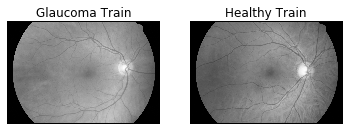

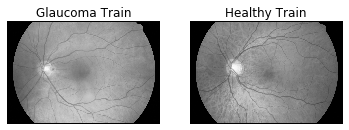

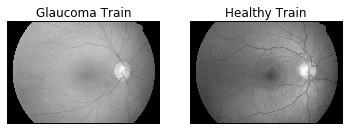

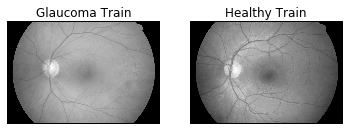

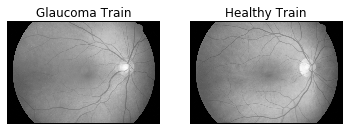

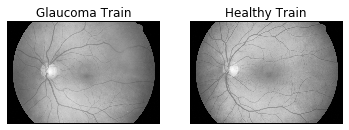

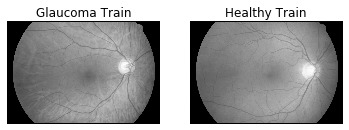

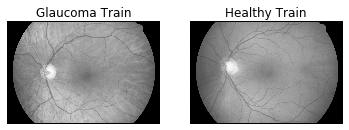

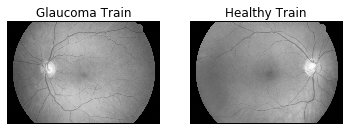

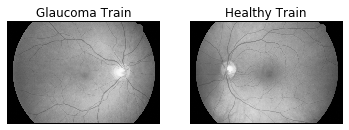

In [13]:

for iPic in range(10):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(originalGlaucomaTrain[iPic],cmap='Greys_r')
    axarr[0].set_title('Glaucoma Train')
    axarr[0].get_xaxis().set_visible(False)
    axarr[0].get_yaxis().set_visible(False)
    axarr[1].imshow(originalHealthyTrain[iPic],cmap='Greys_r')
    axarr[1].set_title('Healthy Train')
    axarr[1].get_xaxis().set_visible(False)
    axarr[1].get_yaxis().set_visible(False)

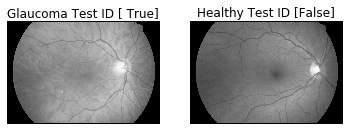

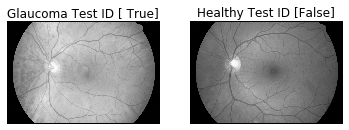

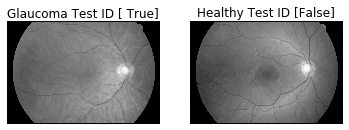

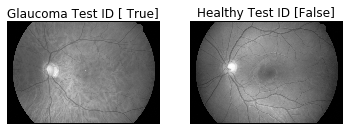

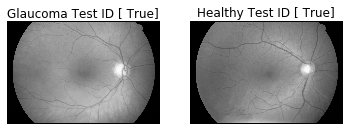

In [14]:
out = trainedNet.predict(testX)
correctTestY = [True,True,True,True,True,False,False,False,False,False]
for iPic in range(5):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(originalGlaucomaTest[iPic],cmap='Greys_r')
    axarr[0].set_title('Glaucoma Test ID ' + str(out[iPic]>.5))
    axarr[0].get_xaxis().set_visible(False)
    axarr[0].get_yaxis().set_visible(False)
    axarr[1].imshow(originalHealthyTest[iPic],cmap='Greys_r')
    axarr[1].set_title('Healthy Test ID ' + str(out[iPic+5]>.5))
    axarr[1].get_xaxis().set_visible(False)
    axarr[1].get_yaxis().set_visible(False)

In [15]:
def identification(pred, act):
    TP=0;
    TN=0;
    FP=0;
    FN=0;
    for i in range(len(act)):
        if act[i]:
            if pred[i]:
                TP+=1.0;
            else:
                FN+=1.0;
        else:
            if pred[i]:
                FP+=1.0;
            else:
                TN+=1.0;
    return TP,TN,FP,FN
def sensitivity(TP, FP):
    return TP/(TP+FN)
def specificity(TN, FP):
    return TN/(TN+FP)
def accuracy(TP, TN, FP, FN):
    return (TN + TP)/(TP + TN + FP + FN)

In [17]:
idTable = np.asarray([range(10),correctTestY, (out>.5).flatten()]).T.tolist()

print tabulate(idTable, headers = ['Picture #','Glaucoma Actual', 'Glaucoma Predicted'])

TP,TN,FP,FN = identification((out>.5).flatten(), correctTestY)
sens = sensitivity(TP, FP)
spec = specificity(TN,FP)
acc = accuracy(TP,TN,FP,FN)

specTable = {"Sensitivity": [sens],"Specificity": [spec], "Accuracy" : [acc]}
print ''
print tabulate(specTable,headers = 'keys')

  Picture #    Glaucoma Actual    Glaucoma Predicted
-----------  -----------------  --------------------
          0                  1                     1
          1                  1                     1
          2                  1                     1
          3                  1                     1
          4                  1                     1
          5                  0                     0
          6                  0                     0
          7                  0                     0
          8                  0                     0
          9                  0                     1

  Sensitivity    Accuracy    Specificity
-------------  ----------  -------------
            1         0.9            0.8
